## <strong> 1. 인공 신경망의 이해 </strong>

우리가 아래에서 사용할 인공 신경망을 살펴보자. <br>
우리가 사용할 신경망은 입력층, 은닉층, 출력층 3개의 층을 사용하면 각각의 층은 2개의 뉴런을 가진다. <br>
또한 은닉층과 출력층의 활성화 함수는 시그모이드 함수를 사용한다고 하자.

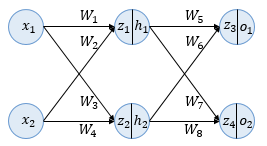

## <strong> 2. 순전파 </strong>

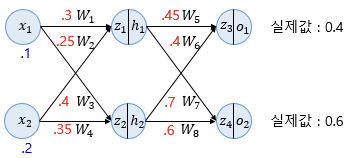

주어진 값이 위의 그림과 같을 때 순전파를 살펴보자.

입력층과 은닉층 사이의 연산은 다음과 같다.

$z_1 = W_1x_1+W_2x_2=0.3\times0.1+0.25\times0.2=0.08$

$z_2 = W_3x_1+W_4x_2=0.4\times0.1+0.35\times0.2=0.11$

위 값들은 은닉층에서 시그모이드 함수를 거치게 된다. <br> 
해당 결과는 아래와 같다.

$h_1=sigmoid(z_1)=0.51998934$

$h_2=sigmoid(z_2)=0.52747230$

해당 값은 출력층의 뉴런으로 향하고 출력층에서 다시 sigmoid 함수를 만난다. <br>
수식은 아래와 같다.

$z_3 = W_5h_1+W_6h_2=0.45\times h_1+0.4\times h_2=0.44498412$

$z_4 = W_7h_1+W_8h_2=0.7\times h_1+0.6\times h_2=0.68047592$

$o_1=sigmoid(z_3)=0.60944600$

$o_2=sigmoid(z_4)=0.66384491$

이제 마지막으로 예측값과 실제값의 오차를 계산해야 한다. <br>
**손실 함수를 MSE로 가정**하자. 수식은 아래와 같다.

$E_{o_1}=\frac{1}{2}(target_{o_1}-output_{o_1})^2=0.02193381$

$E_{o_2}=\frac{1}{2}(target_{o_2}-output_{o_2})^2=0.00203809$

$E_{total} = E_{o_1}+E_{o_2}=0.02397190$

## <strong> 3. 역전파 1단계 </strong>

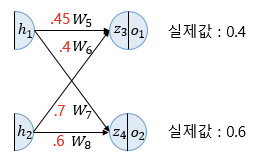

역전파는 순전파와 반대로 출력층에서 입력층 방향으로 계산하면서 가중치를 업데이트한다. <br>

먼저 업데이트 해야 할 가중치는 $W_5, W_6, W_7, W_8$ 총 4개이다. <br>
원리는 모두 동일하므로 $W_5$에 대한 업데이트를 진행해보자. <br>
경사 하강법을 수행하려면 가중치 $W_5$를 업데이트 하기 위해 $\frac{\partial E_{total}}{\partial W_5}$를 구해야 한다.



$\frac{\partial E_{total}}{\partial W_5}$를 계산하기 위해 미분의 **연쇄 법칙(Chain rule)**을 사용할 수 있다.

$\frac{\partial E_{total}}{\partial W_5}=\frac{\partial E_{total}}{\partial o_1}\times \frac{\partial o_1}{\partial z_3} \times \frac{\partial z_3}{∂ W_5}$

먼저 $\frac{\partial E_{total}}{\partial o_1}$는 다음과 같이 계산할 수 있다.

$
E_{total} = 
\frac{1}{2}(target_{o_1}-output_{o_1})^2 +
\frac{1}{2}(target_{o_2}-output_{o_2})^2
$

$
\frac{\partial E_{total}}{\partial W_5} =
2 \times \frac{1}{2}(target_{o_1}-output_{o_1})^{2-1} \times (-1) + 0 = -(target_{o_1}-output_{o_1}) = 0.20944600
$

시그모이드 함수의 미분은 $f(x)\times (1-f(x))$이다. <br>
따라서 $\frac{\partial o_1}{\partial z_3}$는 다음과 같다.

$
\frac{\partial o_1}{\partial z_3} =
o_1\times (1-o_1) = 
0.23802157
$

$\frac{\partial z_3}{∂ W_5}$는 다음과 같다.

$\frac{∂z_3}{∂W_5}=h_1=0.51998934$

이제 세 가지의 결과를 모두 곱해주면 $\frac{\partial E_{total}}{\partial W_5}$를 구할 수 있다.

$\frac{\partial E_{total}}{\partial W_5} =
0.20944600\times0.23802157\times0.51998934 =
0.02592286$

이제 해당 값으로 경사 하강법을 이용해 가중치를 업데이트 할 수 있다.

$
W_5^+ = 
W_5-\alpha\frac{\partial E_{total}}{\partial W_5} = 
0.43703857
$

이와 같은 방법으로 $W_6^+, W_7^+, W_8^+$도 구할 수 있다.

## <strong> 4. 역전파 2단계 </strong>

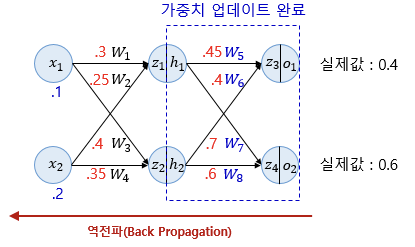

이번에는 가중치 $W_1, W_2, W_3, W_4$를 갱신해보자. <br>
$W_1$을 업데이트 하는 과정을 살펴보자.

$\frac{\partial E_{total}}{∂ W_1}$를 계산하기 위한 연쇄 법칙은 아래와 같다.

$
\frac{\partial E_{total}}{∂ W_1} =
\frac{\partial E_{total}}{∂ h_1} \times
\frac{\partial h_1}{∂ z_1} \times
\frac{\partial z_1}{∂ W_1}
$

이때 $\frac{\partial E_{total}}{∂ h_1}$는 아래와 같이 풀어 쓸 수 있다.

$
\frac{\partial E_{total}}{∂ h_1} =
\frac{\partial E_{o_1}}{∂ h_1} +
\frac{\partial E_{o_2}}{∂ h_1}
$

$\frac{\partial E_{o_1}}{∂ h_1}$를 구해보자. 풀이는 다음과 같다.

$
\frac{\partial E_{o_1}}{∂ h_1} =
\frac{\partial E_{o_1}}{∂ o_1} \times
\frac{\partial o_1}{∂ z_3} \times
\frac{\partial z_3}{∂ h_1} = 
- (target_{o_1}-ouput_{o_1}) \times o_1 \times (1-o_1) \times W_5 = 0.02243370
$

$\frac{\partial E_{o_2}}{∂ h_1}$ 도 동일한 원리로 구할 수 있다.

$\frac{\partial E_{o_2}}{∂ h_1} = 
\frac{\partial E_{o_2}}{∂ o_2} \times
\frac{\partial o_2}{∂ z_4} \times
\frac{\partial z_4}{∂ h_1} = 0.00997311$

따라서 $\frac{\partial E_{total}}{∂ h_1}$는 다음과 같다.

$
\frac{\partial E_{total}}{∂ h_1} =
0.02243370 + 0.00997311 = 0.03240681
$

나머지 두 항의 결과는 다음과 같다.

$
\frac{\partial h_1}{∂ z_1} = 
h_1 \times (1-h_1) = 0.24960043
$

$
\frac{\partial z_1}{∂ W_1} =
x_1 =
0.1
$

따라서 $\frac{\partial E_{total}}{∂ W_1}$는 다음과 같다.

$\frac{\partial E_{total}}{∂ W_1} = 
0.03240681 \times 0.24960043 \times 0.1 =
0.00080888$

해당 값으로 가중치의 값을 갱신할 수 있다.

$
W_1^{+} = 
W_1 - α\frac{∂E_{total}}{∂W_1}
= 0.29959556
$

순전파를 다시 계산해보면 이전보다 오차값이 작아진 것을 확인할 수 있다.

출처: https://wikidocs.net/60682